In [1]:
import numpy as np
import cmath
import matplotlib.pyplot as plt 
%config InlineBackend.figure_format = 'retina'


In [2]:
parms = { 'figure.figsize': (6.0,4.0),
          'axes.labelsize': 16,
          'xtick.labelsize': 17,
          'ytick.labelsize': 14,
          'legend.fontsize': 10}

plt.rcParams.update(parms)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

In [3]:
def Euler(f,t,x0):
    y = [x0]
    for i in range(len(t)-1):
        h = t[i+1] - t[i]
        y.append(y[i] + np.array(f(y[i]))*h)
    return y

In [4]:
def f(z,p):
    return  complex(p[0], p[1])*z +  complex(p[2],p[3])*(z.conjugate())*z**2

def F(z,p1,p2,ep):
    w0 = f(z[0],p1) + ep * z[1]
    w1 = f(z[1],p2) + ep * z[0]
    w2 = f(z[2],p1) + ep * z[1]
    return [w0, w1, w2]

In [5]:
#to show synchronisation

In [6]:
a_s = 1
b_s = 2
c_s = -1
d_s = -1

al_s = 1
be_s = 1
ga_s = -1
de_s = 1

ep_s = 0.1

p1_s = [al_s, be_s, ga_s, de_s]
p2_s = [a_s,b_s,c_s,d_s]

def F_s(z):
    return F(z,p1_s,p2_s,ep_s)

In [7]:
x0_s = [-1,1+0.4j, -1+0.3j]

t_init_s = 0
t_final_s = 4000
tstep_s = 0.05
t_s = np.arange(t_init_s, t_final_s, tstep_s)

In [8]:
z_s = Euler(F_s,t_s,x0_s)

In [9]:
ph_s = [cmath.phase(i[0]*(i[2].conjugate())) for i in z_s]

Text(0, 0.5, '$\\hat{\\Phi}$')

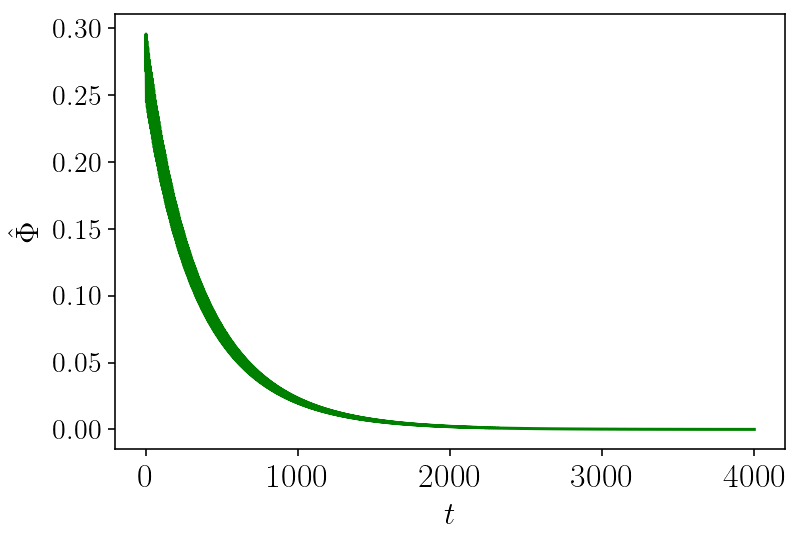

In [10]:
plt.plot(t_s,ph_s,'g')
plt.xlabel(r'$t$')
plt.ylabel(r'$\hat{\Phi}$', rotation=90)

In [11]:
#to show a phase difference

In [12]:
a_a = 1
b_a = 6
c_a = -1
d_a = -1

al_a = 1
be_a = 0.1
ga_a = -1
de_a = 1

ep_a = 0.1

p1_a = [al_a, be_a, ga_a, de_a]
p2_a = [a_a,b_a,c_a,d_a]

def F_a(z):
    return F(z,p1_a,p2_a,ep_a)

In [13]:
x0_a = [1+0.3j,1+0.4j, -0.2+0.9j]

t_init_a = 0
t_final_a = 20000
tstep_a = 0.05
t_a = np.arange(t_init_a, t_final_a, tstep_a)

In [14]:
z_a = Euler(F_a,t_a,x0_a)

In [15]:
ph_a = [cmath.phase(i[0]*(i[2].conjugate())) for i in z_a]

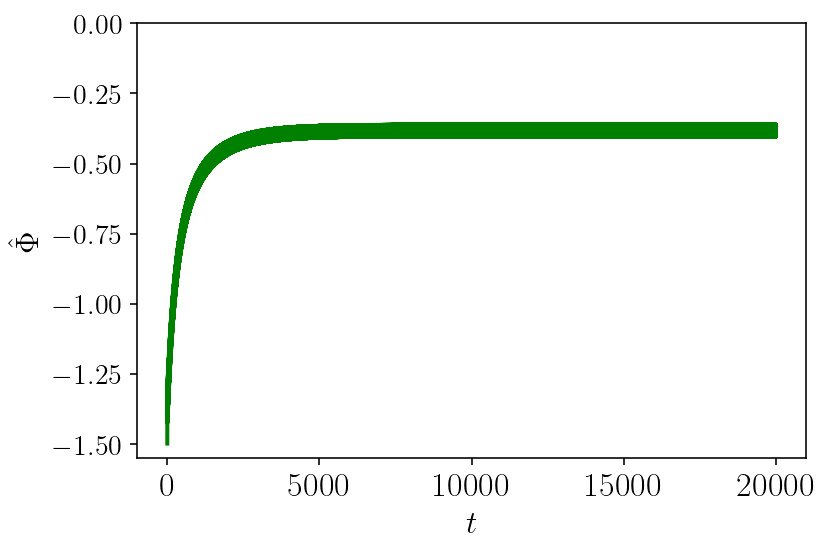

In [16]:
plt.ylim([-1.55, 0])
plt.xlabel(r'$t$')
plt.ylabel(r'$\hat{\Phi}$', rotation=90)
plt.plot(t_a, ph_a, 'g',lw=2)


In [17]:
#to show order epsilon -2

In [18]:
a = 1
b = 2
c = -1
d = -1

al = 1
be = 1
ga = -1
de = 1

p1 = [al, be, ga, de]
p2 = [a,b,c,d]

def Fo(z, ep):
    return F(z,p1,p2,ep)

x0 = [-1+0.3j,1+0.4j, -1+0.5j]

In [19]:
def tenthtime(ep):
    t=0
    p =  [-1+0.3j,1+0.4j, -1+0.5j]
    v = cmath.phase((-1+0.3j)*((-1+0.5j).conjugate() ) ) 
    while cmath.phase(p[0]*(p[2].conjugate() ) ) > 0.1*v:
        p =  p + np.array(Fo(p,ep))*0.05
        t = t+0.05
    return t

In [20]:
ep1 = 0.01
ep2 = 0.1
n=20

lep1 = np.log(ep1)
lep2 = np.log(ep2)

stp = (lep2-lep1)/(n-1)

eplistlog = [lep1 + i*stp for i in range(0,n)]
eplist = [np.exp(t) for t in eplistlog]



In [21]:
tenthtimelist = [tenthtime(ep) for ep in eplist]


In [22]:
tenthtimelistlog = [np.log(a) for a in tenthtimelist]


In [23]:
complep = [lep1, lep2]
compltime = [tenthtimelistlog[0], tenthtimelistlog[0]+(-2)*(lep2 - lep1)]

Text(0, 0.5, '$\\ln(T_{0.1})$')

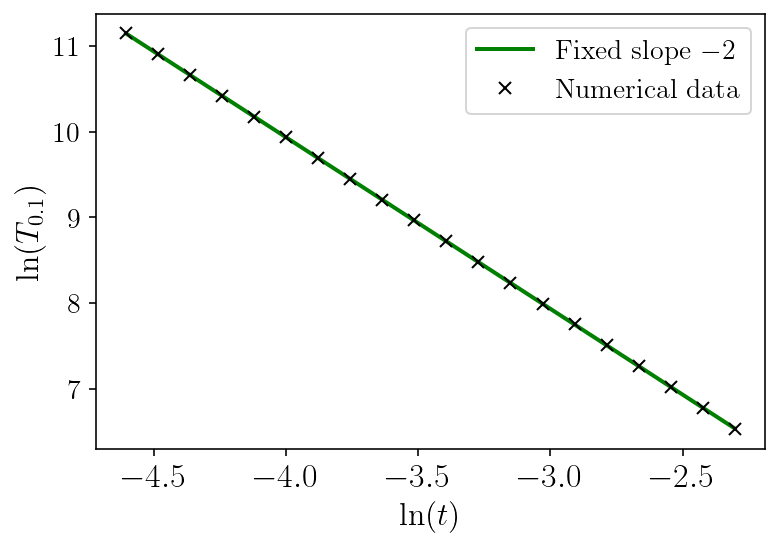

In [24]:
plt.plot(complep, compltime, 'g',label='Fixed slope ' r'$-2$',lw=2)
plt.plot(eplistlog,tenthtimelistlog,'kx', label='Numerical data', lw=2 )
plt.legend(fontsize=14)
plt.xlabel(r'$\ln(t)$')
plt.ylabel(r'$\ln(T_{0.1})$', rotation=90)
